	 Comparative sales analysis of different stores, customers, demographics								

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn
import seaborn as sns

In [2]:
train = pd.read_csv("data/train.csv", sep=',', parse_dates=['Date'], dtype={'StateHoliday': str, 'SchoolHoliday':str})
test = pd.read_csv("data/test.csv", sep=",", index_col = 'Id', parse_dates=['Date'], dtype={'StateHoliday': str, 'SchoolHoliday':str})
store = pd.read_csv("data/store.csv", sep=",", dtype={'StoreType': str, 'Assortment': str, 'PromoInterval': str})

In [3]:
print(train.head())
print(train.tail())

   Store  DayOfWeek       Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1            0   
1      2          5 2015-07-31   6064        625     1      1            0   
2      3          5 2015-07-31   8314        821     1      1            0   
3      4          5 2015-07-31  13995       1498     1      1            0   
4      5          5 2015-07-31   4822        559     1      1            0   

  SchoolHoliday  
0             1  
1             1  
2             1  
3             1  
4             1  
         Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
1017204   1111          2 2013-01-01      0          0     0      0   
1017205   1112          2 2013-01-01      0          0     0      0   
1017206   1113          2 2013-01-01      0          0     0      0   
1017207   1114          2 2013-01-01      0          0     0      0   
1017208   1115          2 2013-01-01      0          0     0      0 

In [4]:
train.loc[train['Open'] == 0, 'Sales'].mean()

0.0

In [5]:
train['Year'] = pd.DatetimeIndex(train['Date']).year
train['Month'] = pd.DatetimeIndex(train['Date']).month

In [6]:
train = train[['Store', 'DayOfWeek', 'Date', 'Year', 'Month', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'Sales']]
train.dtypes

Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Year                      int64
Month                     int64
Customers                 int64
Open                      int64
Promo                     int64
StateHoliday             object
SchoolHoliday            object
Sales                     int64
dtype: object

In [7]:
train['StateHoliday'].unique()

array(['0', 'a', 'b', 'c'], dtype=object)

In [8]:
train.loc[train['StateHoliday'] == '0', 'StateHoliday'] = 0
train.loc[train['StateHoliday'] == 'a', 'StateHoliday'] = 1
train.loc[train['StateHoliday'] == 'b', 'StateHoliday'] = 2
train.loc[train['StateHoliday'] == 'c', 'StateHoliday'] = 3
train['StateHoliday'] = train['StateHoliday'].astype(int, copy=False)

In [9]:
print('levels :', train['StateHoliday'].unique(), '; data type :', train['StateHoliday'].dtype)

levels : [0 1 2 3] ; data type : int32


In [10]:
def factor_to_integer(df, colname, start_value=0):
    while df[colname].dtype == object:
        myval = start_value # factor starts at "start_value".
        for sval in df[colname].unique():
            df.loc[df[colname] == sval, colname] = myval
            myval += 1
        df[colname] = df[colname].astype(int, copy=False)
    print('levels :', df[colname].unique(), '; data type :', df[colname].dtype)

In [11]:
train['SchoolHoliday'].unique()

array(['1', '0'], dtype=object)

In [12]:
factor_to_integer(train, 'SchoolHoliday')

levels : [0 1] ; data type : int32


In [13]:
train.dtypes
print(train.describe())

              Store     DayOfWeek          Year         Month     Customers  \
count  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06   
mean   5.584297e+02  3.998341e+00  2.013832e+03  5.846762e+00  6.331459e+02   
std    3.219087e+02  1.997391e+00  7.773960e-01  3.326097e+00  4.644117e+02   
min    1.000000e+00  1.000000e+00  2.013000e+03  1.000000e+00  0.000000e+00   
25%    2.800000e+02  2.000000e+00  2.013000e+03  3.000000e+00  4.050000e+02   
50%    5.580000e+02  4.000000e+00  2.014000e+03  6.000000e+00  6.090000e+02   
75%    8.380000e+02  6.000000e+00  2.014000e+03  8.000000e+00  8.370000e+02   
max    1.115000e+03  7.000000e+00  2.015000e+03  1.200000e+01  7.388000e+03   

               Open         Promo  StateHoliday  SchoolHoliday         Sales  
count  1.017209e+06  1.017209e+06  1.017209e+06   1.017209e+06  1.017209e+06  
mean   8.301067e-01  3.815145e-01  4.516279e-02   8.213533e-01  5.773819e+03  
std    3.755392e-01  4.857586e-01  2.836559e-01   3

In [14]:
train['Open'].unique()

array([1, 0], dtype=int64)

In [15]:
train = train[['Store', 'DayOfWeek', 'Date', 'Year', 'Month', 'Customers', 'Open',
               'Promo', 'StateHoliday', 'SchoolHoliday', 'Sales']]
list(train.columns.values)

['Store',
 'DayOfWeek',
 'Date',
 'Year',
 'Month',
 'Customers',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'Sales']

In [16]:
print("NANs for individual columns")
print("---------------------------")
from collections import Counter
x = {colname : train[colname].isnull().sum() for colname in train.columns}
Counter(x).most_common()

NANs for individual columns
---------------------------


[('Store', 0),
 ('DayOfWeek', 0),
 ('Date', 0),
 ('Year', 0),
 ('Month', 0),
 ('Customers', 0),
 ('Open', 0),
 ('Promo', 0),
 ('StateHoliday', 0),
 ('SchoolHoliday', 0),
 ('Sales', 0)]

In [17]:
corMat = pd.DataFrame(train.loc[:, ['DayOfWeek', 'Sales', 'Month', 'Year', 'Customers', 'Promo',
                                    'StateHoliday', 'SchoolHoliday']].corr())
print(corMat)

               DayOfWeek     Sales     Month      Year  Customers     Promo  \
DayOfWeek       1.000000 -0.462125 -0.005362  0.001937  -0.386445 -0.392925   
Sales          -0.462125  1.000000  0.048768  0.023519   0.894711  0.452345   
Month          -0.005362  0.048768  1.000000 -0.269382   0.038179 -0.011747   
Year            0.001937  0.023519 -0.269382  1.000000  -0.001212  0.024300   
Customers      -0.386445  0.894711  0.038179 -0.001212   1.000000  0.316169   
Promo          -0.392925  0.452345 -0.011747  0.024300   0.316169  1.000000   
StateHoliday   -0.044265 -0.229029  0.038058 -0.005067  -0.204295 -0.024157   
SchoolHoliday   0.205388 -0.085124 -0.103282  0.036535  -0.071568 -0.067483   

               StateHoliday  SchoolHoliday  
DayOfWeek         -0.044265       0.205388  
Sales             -0.229029      -0.085124  
Month              0.038058      -0.103282  
Year              -0.005067       0.036535  
Customers         -0.204295      -0.071568  
Promo             

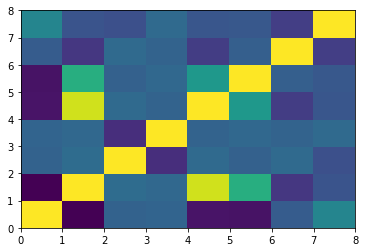

In [18]:
# visualize correlations using heatmap
plt.pcolor(corMat)
plt.show()

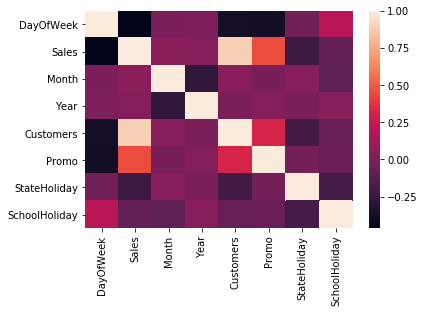

In [19]:
sns.heatmap(data=corMat)
plt.show()

Test DataSet

In [20]:
test.shape

(41088, 7)

In [21]:
test['Year'] = pd.DatetimeIndex(test['Date']).year
test['Month'] = pd.DatetimeIndex(test['Date']).month

In [22]:
print(test.head())

    Store  DayOfWeek       Date  Open  Promo StateHoliday SchoolHoliday  Year  \
Id                                                                              
1       1          4 2015-09-17   1.0      1            0             0  2015   
2       3          4 2015-09-17   1.0      1            0             0  2015   
3       7          4 2015-09-17   1.0      1            0             0  2015   
4       8          4 2015-09-17   1.0      1            0             0  2015   
5       9          4 2015-09-17   1.0      1            0             0  2015   

    Month  
Id         
1       9  
2       9  
3       9  
4       9  
5       9  


In [23]:
sum(test['Open'] == 0)

5984

In [24]:
test = test[['Store', 'DayOfWeek', 'Date', 'Year', 'Month', 'Open',
             'Promo', 'StateHoliday', 'SchoolHoliday']]
list(test.columns.values)

['Store',
 'DayOfWeek',
 'Date',
 'Year',
 'Month',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday']

In [25]:
print("NANs for individual columns")
print("---------------------------")
from collections import Counter
x = {colname : test[colname].isnull().sum() for colname in test.columns}
Counter(x).most_common()

NANs for individual columns
---------------------------


[('Open', 11),
 ('Store', 0),
 ('DayOfWeek', 0),
 ('Date', 0),
 ('Year', 0),
 ('Month', 0),
 ('Promo', 0),
 ('StateHoliday', 0),
 ('SchoolHoliday', 0)]

In [26]:
print(test.loc[np.isnan(test['Open'])])

       Store  DayOfWeek       Date  Year  Month  Open  Promo StateHoliday  \
Id                                                                          
480      622          4 2015-09-17  2015      9   NaN      1            0   
1336     622          3 2015-09-16  2015      9   NaN      1            0   
2192     622          2 2015-09-15  2015      9   NaN      1            0   
3048     622          1 2015-09-14  2015      9   NaN      1            0   
4760     622          6 2015-09-12  2015      9   NaN      0            0   
5616     622          5 2015-09-11  2015      9   NaN      0            0   
6472     622          4 2015-09-10  2015      9   NaN      0            0   
7328     622          3 2015-09-09  2015      9   NaN      0            0   
8184     622          2 2015-09-08  2015      9   NaN      0            0   
9040     622          1 2015-09-07  2015      9   NaN      0            0   
10752    622          6 2015-09-05  2015      9   NaN      0            0   

In [27]:
print(train.loc[train['Store'] == 622].head())

      Store  DayOfWeek       Date  Year  Month  Customers  Open  Promo  \
621     622          5 2015-07-31  2015      7        540     1      1   
1736    622          4 2015-07-30  2015      7        406     1      1   
2851    622          3 2015-07-29  2015      7        468     1      1   
3966    622          2 2015-07-28  2015      7        417     1      1   
5081    622          1 2015-07-27  2015      7        517     1      1   

      StateHoliday  SchoolHoliday  Sales  
621              0              0   6306  
1736             0              0   5412  
2851             0              0   5326  
3966             0              0   4966  
5081             0              0   5413  


In [28]:
test.loc[np.isnan(test['Open']), 'Open'] = 1

In [29]:
print("NANs for individual columns")
print("---------------------------")
from collections import Counter
x = {colname : test[colname].isnull().sum() for colname in test.columns}
Counter(x).most_common()

NANs for individual columns
---------------------------


[('Store', 0),
 ('DayOfWeek', 0),
 ('Date', 0),
 ('Year', 0),
 ('Month', 0),
 ('Open', 0),
 ('Promo', 0),
 ('StateHoliday', 0),
 ('SchoolHoliday', 0)]

In [30]:
test.dtypes

Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Year                      int64
Month                     int64
Open                    float64
Promo                     int64
StateHoliday             object
SchoolHoliday            object
dtype: object

In [31]:
test['StateHoliday'].unique()

array(['0', 'a'], dtype=object)

In [32]:
test['SchoolHoliday'].unique()

array(['0', '1'], dtype=object)

In [33]:
factor_to_integer(test, 'StateHoliday')
factor_to_integer(test, 'SchoolHoliday')
test.dtypes

levels : [0 1] ; data type : int32
levels : [0 1] ; data type : int32


Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Year                      int64
Month                     int64
Open                    float64
Promo                     int64
StateHoliday              int32
SchoolHoliday             int32
dtype: object

In [34]:
train.loc[train['StateHoliday'] > 1].shape

(10790, 11)

In [35]:
train = train.loc[train['StateHoliday'] < 2]

Store Dataset

In [36]:
store.shape

(1115, 10)

In [37]:
print(store.head())

   Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,

In [38]:
store.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [39]:
print("NANs for individual columns")
print("---------------------------")
from collections import Counter
x = {colname : store[colname].isnull().sum() for colname in store.columns}
Counter(x).most_common()

NANs for individual columns
---------------------------


[('Promo2SinceWeek', 544),
 ('Promo2SinceYear', 544),
 ('PromoInterval', 544),
 ('CompetitionOpenSinceMonth', 354),
 ('CompetitionOpenSinceYear', 354),
 ('CompetitionDistance', 3),
 ('Store', 0),
 ('StoreType', 0),
 ('Assortment', 0),
 ('Promo2', 0)]

In [40]:
store['PromoInterval'].unique()

array([nan, 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

In [41]:
store.loc[store['Promo2'] == 0, ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']] = 0

In [42]:
store.loc[store['Promo2'] != 0, 'Promo2SinceWeek'] = store['Promo2SinceWeek'].max() - store.loc[store['Promo2'] != 0, 'Promo2SinceWeek']

In [43]:
store.loc[store['Promo2'] != 0, 'Promo2SinceYear'] = store['Promo2SinceYear'].max() - store.loc[store['Promo2'] != 0, 'Promo2SinceYear']

In [44]:
factor_to_integer(store, 'PromoInterval', start_value=0)

levels : [0 1 2 3] ; data type : int32


In [45]:
store.dtypes

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                  int32
dtype: object

In [46]:
factor_to_integer(store, 'StoreType')
factor_to_integer(store, 'Assortment')
store.dtypes

levels : [0 1 2 3] ; data type : int32
levels : [0 1 2] ; data type : int32


Store                          int64
StoreType                      int32
Assortment                     int32
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                  int32
dtype: object

In [47]:
print(store.head())

   Store  StoreType  Assortment  CompetitionDistance  \
0      1          0           0               1270.0   
1      2          1           0                570.0   
2      3          1           0              14130.0   
3      4          0           1                620.0   
4      5          1           0              29910.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1                       11.0                    2007.0       1   
2                       12.0                    2006.0       1   
3                        9.0                    2009.0       0   
4                        4.0                    2015.0       0   

   Promo2SinceWeek  Promo2SinceYear  PromoInterval  
0              0.0              0.0              0  
1             37.0              5.0              1  
2             36.0              4.0              1  
3              0.0              0.0              0  
4

In [48]:
print("NANs for individual columns")
print("---------------------------")
from collections import Counter
x = {colname : store[colname].isnull().sum() for colname in store.columns}
Counter(x).most_common()

NANs for individual columns
---------------------------


[('CompetitionOpenSinceMonth', 354),
 ('CompetitionOpenSinceYear', 354),
 ('CompetitionDistance', 3),
 ('Store', 0),
 ('StoreType', 0),
 ('Assortment', 0),
 ('Promo2', 0),
 ('Promo2SinceWeek', 0),
 ('Promo2SinceYear', 0),
 ('PromoInterval', 0)]

Filling the missing values with sklearn’s built-in command. Filling with the column.mean().

In [49]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer().fit(store)
store_imputed = imputer.transform(store)

In [50]:
store2 = pd.DataFrame(store_imputed, columns=store.columns.values)

In [51]:
print("NANs for individual columns")
print("---------------------------")
from collections import Counter
x = {colname : store2[colname].isnull().sum() for colname in store2.columns}
Counter(x).most_common()

NANs for individual columns
---------------------------


[('Store', 0),
 ('StoreType', 0),
 ('Assortment', 0),
 ('CompetitionDistance', 0),
 ('CompetitionOpenSinceMonth', 0),
 ('CompetitionOpenSinceYear', 0),
 ('Promo2', 0),
 ('Promo2SinceWeek', 0),
 ('Promo2SinceYear', 0),
 ('PromoInterval', 0)]

In [52]:
store2.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1.0,0.0,0.0,1270.0,9.0,2008.0,0.0,0.0,0.0,0.0
1,2.0,1.0,0.0,570.0,11.0,2007.0,1.0,37.0,5.0,1.0
2,3.0,1.0,0.0,14130.0,12.0,2006.0,1.0,36.0,4.0,1.0
3,4.0,0.0,1.0,620.0,9.0,2009.0,0.0,0.0,0.0,0.0
4,5.0,1.0,0.0,29910.0,4.0,2015.0,0.0,0.0,0.0,0.0


In [53]:
store2['CompetitionOpenSinceMonth'] = store2['CompetitionOpenSinceMonth'].max() - store2['CompetitionOpenSinceMonth']

In [54]:
store2['CompetitionOpenSinceYear'] = store2['CompetitionOpenSinceYear'].max() - store2['CompetitionOpenSinceYear']

In [55]:
store2.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111.0,1.0,0.0,1900.0,6.000000,1.000000,1.0,19.0,2.0,1.0
1111,1112.0,0.0,1.0,1880.0,8.000000,9.000000,0.0,0.0,0.0,0.0
1112,1113.0,1.0,1.0,9260.0,4.775296,6.331143,0.0,0.0,0.0,0.0
1113,1114.0,1.0,1.0,870.0,4.775296,6.331143,0.0,0.0,0.0,0.0
1114,1115.0,2.0,1.0,5350.0,4.775296,6.331143,1.0,28.0,3.0,3.0


In [56]:
len(store2['Store']) - sum(store2['Store'].isin(train['Store']))

0

Checking if there are additional (unnecessary) stores in "train" data.
No difference at all!

In [57]:
StoreStore = pd.Series(store2['Store']); StoreTrain = pd.Series(train['Store'])
sum(StoreTrain.isin(StoreStore) == False)

0

In [58]:
train_store = pd.merge(train, store2, how = 'left', on='Store')

In [59]:
print(train_store.head())

   Store  DayOfWeek       Date  Year  Month  Customers  Open  Promo  \
0      1          5 2015-07-31  2015      7        555     1      1   
1      2          5 2015-07-31  2015      7        625     1      1   
2      3          5 2015-07-31  2015      7        821     1      1   
3      4          5 2015-07-31  2015      7       1498     1      1   
4      5          5 2015-07-31  2015      7        559     1      1   

   StateHoliday  SchoolHoliday  Sales  StoreType  Assortment  \
0             0              0   5263        0.0         0.0   
1             0              0   6064        1.0         0.0   
2             0              0   8314        1.0         0.0   
3             0              0  13995        0.0         1.0   
4             0              0   4822        1.0         0.0   

   CompetitionDistance  CompetitionOpenSinceMonth  CompetitionOpenSinceYear  \
0               1270.0                        3.0                       7.0   
1                570.0        

In [60]:
print(train_store.tail())

         Store  DayOfWeek       Date  Year  Month  Customers  Open  Promo  \
1006414   1111          2 2013-01-01  2013      1          0     0      0   
1006415   1112          2 2013-01-01  2013      1          0     0      0   
1006416   1113          2 2013-01-01  2013      1          0     0      0   
1006417   1114          2 2013-01-01  2013      1          0     0      0   
1006418   1115          2 2013-01-01  2013      1          0     0      0   

         StateHoliday  SchoolHoliday  Sales  StoreType  Assortment  \
1006414             1              0      0        1.0         0.0   
1006415             1              0      0        0.0         1.0   
1006416             1              0      0        1.0         1.0   
1006417             1              0      0        1.0         1.0   
1006418             1              0      0        2.0         1.0   

         CompetitionDistance  CompetitionOpenSinceMonth  \
1006414               1900.0                   6.000000  

In [61]:
test_store = test.reset_index().merge(store2, how = 'left', on='Store').set_index('Id')

In [62]:
print(test_store.head())

    Store  DayOfWeek       Date  Year  Month  Open  Promo  StateHoliday  \
Id                                                                        
1       1          4 2015-09-17  2015      9   1.0      1             0   
2       3          4 2015-09-17  2015      9   1.0      1             0   
3       7          4 2015-09-17  2015      9   1.0      1             0   
4       8          4 2015-09-17  2015      9   1.0      1             0   
5       9          4 2015-09-17  2015      9   1.0      1             0   

    SchoolHoliday  StoreType  Assortment  CompetitionDistance  \
Id                                                              
1               0        0.0         0.0               1270.0   
2               0        1.0         0.0              14130.0   
3               0        1.0         1.0              24000.0   
4               0        1.0         0.0               7520.0   
5               0        1.0         1.0               2030.0   

    CompetitionOpe

In [63]:
test_store.shape

(41088, 18)

In [64]:
test_store.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Year                         0
Month                        0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

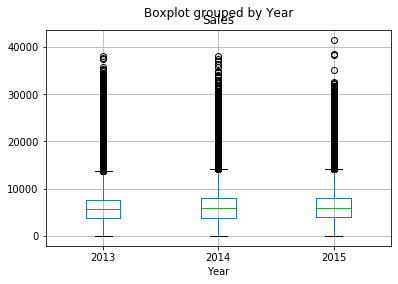

In [65]:
train_store.boxplot(column='Sales', by='Year')
plt.show()

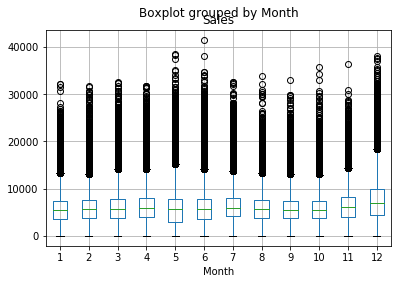

In [66]:
train_store.boxplot(column='Sales', by='Month')
plt.show()

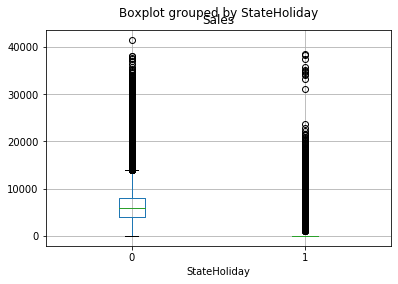

In [67]:
train_store.boxplot(column='Sales', by='StateHoliday')
plt.show()

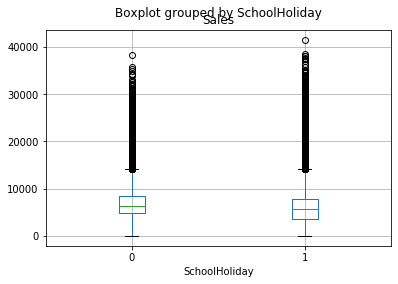

In [68]:
train_store.boxplot(column='Sales', by='SchoolHoliday')
plt.show()

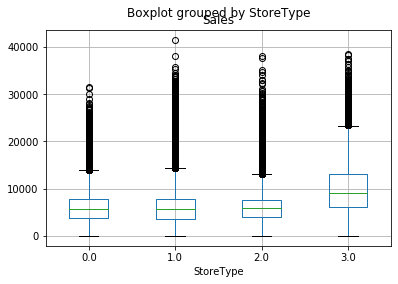

In [69]:
train_store.boxplot(column='Sales', by='StoreType')
plt.show()

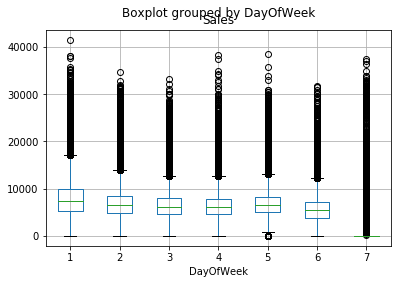

In [70]:
train_store.boxplot(column='Sales', by='DayOfWeek')
plt.show()

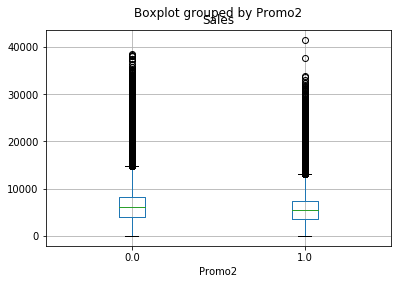

In [71]:
train_store.boxplot(column='Sales', by='Promo2')
plt.show()

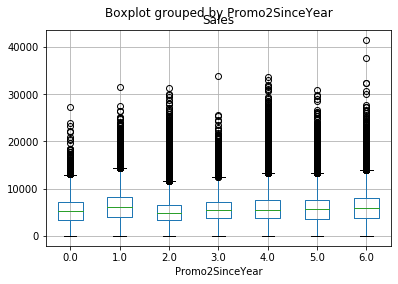

In [72]:
train_store.loc[train_store['Promo2'] != 0].boxplot(column='Sales', by='Promo2SinceYear')
plt.show()

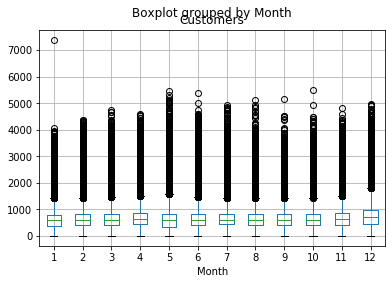

In [73]:
train_store.boxplot(column='Customers', by='Month')
plt.show()

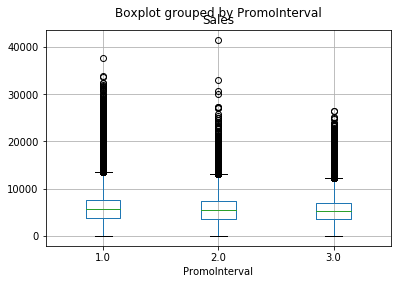

In [74]:
train_store.loc[train_store['Promo2'] != 0].boxplot(column='Sales', by='PromoInterval')
plt.show()

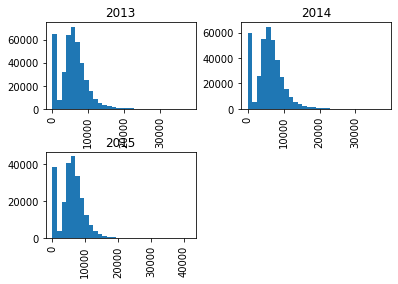

In [75]:
train_store.hist(column='Sales', by='Year', bins=30)
plt.show()

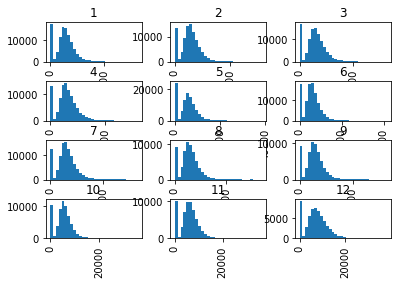

In [76]:
train_store.hist(column='Sales', by='Month', bins=30)
plt.show()

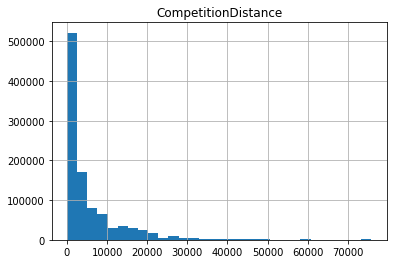

In [77]:
train_store.hist(column='CompetitionDistance', bins=30)
plt.show()

#MODELING

In [78]:
train_store.columns.values

array(['Store', 'DayOfWeek', 'Date', 'Year', 'Month', 'Customers', 'Open',
       'Promo', 'StateHoliday', 'SchoolHoliday', 'Sales', 'StoreType',
       'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'], dtype=object)

In [79]:
train_model = train_store.drop(['Customers', 'Date'], axis=1)
train_model['Year'] = train_model['Year'].max() - train_model['Year']
print(train_model.head())

   Store  DayOfWeek  Year  Month  Open  Promo  StateHoliday  SchoolHoliday  \
0      1          5     0      7     1      1             0              0   
1      2          5     0      7     1      1             0              0   
2      3          5     0      7     1      1             0              0   
3      4          5     0      7     1      1             0              0   
4      5          5     0      7     1      1             0              0   

   Sales  StoreType  Assortment  CompetitionDistance  \
0   5263        0.0         0.0               1270.0   
1   6064        1.0         0.0                570.0   
2   8314        1.0         0.0              14130.0   
3  13995        0.0         1.0                620.0   
4   4822        1.0         0.0              29910.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        3.0                       7.0     0.0   
1                        1.0                       8.0     1.0

In [80]:
test_model = test_store.drop(['Date'], axis=1)
test_model['Year'] = test_model['Year'].max() - test_model['Year']

In [81]:
print(test_model.head())

    Store  DayOfWeek  Year  Month  Open  Promo  StateHoliday  SchoolHoliday  \
Id                                                                            
1       1          4     0      9   1.0      1             0              0   
2       3          4     0      9   1.0      1             0              0   
3       7          4     0      9   1.0      1             0              0   
4       8          4     0      9   1.0      1             0              0   
5       9          4     0      9   1.0      1             0              0   

    StoreType  Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
Id                                                                          
1         0.0         0.0               1270.0                        3.0   
2         1.0         0.0              14130.0                        0.0   
3         1.0         1.0              24000.0                        8.0   
4         1.0         0.0               7520.0               

In [82]:
test_model_open = test_model.loc[test_model['Open'] == 1]
test_model_open = test_model_open.drop('Open', axis=1)

test_model_close = test_model.loc[test_model['Open'] == 0]

test_model_open.head()

,Store,DayOfWeek,Year,Month,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Id,,,,,,,,,,,,,,,,
1,1,4,0,9,1,0,0,0.0,0.0,1270.0,3.0,7.0,0.0,0.0,0.0,0.0
2,3,4,0,9,1,0,0,1.0,0.0,14130.0,0.0,9.0,1.0,36.0,4.0,1.0
3,7,4,0,9,1,0,0,1.0,1.0,24000.0,8.0,2.0,0.0,0.0,0.0,0.0
4,8,4,0,9,1,0,0,1.0,0.0,7520.0,2.0,1.0,0.0,0.0,0.0,0.0
5,9,4,0,9,1,0,0,1.0,1.0,2030.0,4.0,15.0,0.0,0.0,0.0,0.0


In [83]:
test_model_open.isnull().sum()

Store                        0
DayOfWeek                    0
Year                         0
Month                        0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [84]:
train_model.shape

(1006419, 18)

In [85]:
test_model.shape

(41088, 17)

In [86]:
SalesDF = train_model['Sales']
train_model = train_model.drop(['Sales'], axis=1)
train_model['Sales'] = SalesDF

In [87]:
train_model.head()

,Store,DayOfWeek,Year,Month,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Sales
0,1,5,0,7,1,1,0,0,0.0,0.0,1270.0,3.0,7.0,0.0,0.0,0.0,0.0,5263
1,2,5,0,7,1,1,0,0,1.0,0.0,570.0,1.0,8.0,1.0,37.0,5.0,1.0,6064
2,3,5,0,7,1,1,0,0,1.0,0.0,14130.0,0.0,9.0,1.0,36.0,4.0,1.0,8314
3,4,5,0,7,1,1,0,0,0.0,1.0,620.0,3.0,6.0,0.0,0.0,0.0,0.0,13995
4,5,5,0,7,1,1,0,0,1.0,0.0,29910.0,8.0,0.0,0.0,0.0,0.0,0.0,4822


In [88]:
summary = train_model.describe()
train_normalized = train_model.copy()
ncols = len(train_normalized.columns)

for i in range(ncols):
    mean = summary.iloc[1, i]
    sd = summary.iloc[2, i]
    train_normalized.iloc[:,i:(i + 1)] = \
        (train_normalized.iloc[:,i:(i + 1)] - mean) / sd

In [89]:
sales_normalized = train_normalized['Sales']
train_normalized = train_normalized.drop(['Sales'], axis=1)
train_normalized['Sales'] = sales_normalized

In [90]:
train_normalized.head()

,Store,DayOfWeek,Year,Month,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Sales
0,-1.731639,0.497609,-1.501199,0.351249,0.438396,1.27117,-0.143333,-2.207088,-1.770361,-0.930468,-0.539891,-0.669720,0.138083,-1.001134,-0.802376,-0.810676,-0.824297,-0.149270
1,-1.728533,0.497609,-1.501199,0.351249,0.438396,1.27117,-0.143333,-2.207088,-0.300229,-0.930468,-0.630738,-1.423676,0.340127,0.998866,1.416358,1.683018,0.194891,0.060270
2,-1.725426,0.497609,-1.501199,0.351249,0.438396,1.27117,-0.143333,-2.207088,-0.300229,-0.930468,1.129094,-1.800655,0.542171,0.998866,1.356392,1.184279,0.194891,0.648863
3,-1.722320,0.497609,-1.501199,0.351249,0.438396,1.27117,-0.143333,-2.207088,-1.770361,1.008815,-0.624249,-0.669720,-0.063961,-1.001134,-0.802376,-0.810676,-0.824297,2.134997
4,-1.719213,0.497609,-1.501199,0.351249,0.438396,1.27117,-0.143333,-2.207088,-0.300229,-0.930468,3.177039,1.215170,-1.276224,-1.001134,-0.802376,-0.810676,-0.824297,-0.264634


In [91]:
from sklearn.model_selection import train_test_split
X = train_model.drop('Sales', axis=1)
y = train_model['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [92]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns.values)

X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test), columns=X.columns.values)

test_model_open_scaled = pd.DataFrame(scaler.fit_transform(test_model_open), columns=test_model_open.columns.values)

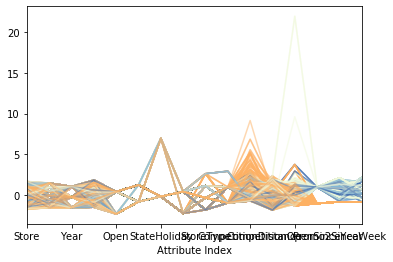

In [93]:
# Get summary to use for scaling

summary = X_train_scaled.describe()
meanSales = summary.iloc[1, 7]
sdSales = summary.iloc[2, 7]
nrows = np.random.randint(0, len(X_train_scaled.index), 2000)

for i in nrows:
    # plot rows of data as if they were series data
    dataRow = X_train_scaled.iloc[i, :-1]
    normTarget = X_train_scaled.iloc[i, -1]
    labelColor = 1.0 / (1.0 + math.exp(-normTarget))
    dataRow.plot(color = plt.cm.RdYlBu(labelColor), alpha=0.5)


plt.xlabel("Attribute Index")
plt.show()

In [94]:
# Comparing algorithms (Best suited for the dataset)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

In [95]:
def score(i):
    lin =i()
    lin.fit(X_train, y_train)
    y_pred =lin.predict(X_test)
    lin_r=r2_score(y_test, y_pred)
    s.append(lin_r)
algos=[LinearRegression,KNeighborsRegressor, RandomForestRegressor, Lasso, ElasticNet, DecisionTreeRegressor]
s=[]
for i in algos:
    score(i)
models =pd.DataFrame({'Method':['LinearRegression','KNeighborsRegressor', 'RandomForestRegressor', 'Lasso', 'ElasticNet', 'DecisionTreeRegressor'], 'Score':[s[0],s[1],s[2],s[3],s[4],s[5]]})
models.sort_values(by='Score',ascending=False)

C:\Users\ujjwa\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,Method,Score
2,RandomForestRegressor,0.927547
5,DecisionTreeRegressor,0.902898
1,KNeighborsRegressor,0.880482
0,LinearRegression,0.548125
3,Lasso,0.548108
4,ElasticNet,0.360054


In [96]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=10,n_jobs=-1, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                      oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [97]:
rf.score(X_test, y_test)

0.9276052303615141

In [98]:
test_model['Predict'] = rf.predict(test_model)

In [99]:
final_report = test_model['Predict']
final_report = final_report.reset_index()
final_report.head()

,Id,Predict
0,1,4380.316667
1,2,8487.650000
2,3,10824.100000
3,4,8126.000000
4,5,7524.720000


In [100]:
final_report.tail()

,Id,Predict
41083,41084,2640.432619
41084,41085,7086.456667
41085,41086,5296.000000
41086,41087,21371.650000
41087,41088,7137.258333


In [101]:
final_report.to_csv("result/final_report.csv", sep=',', index=False)

In [102]:
train_model.to_csv("result/train_model.csv", sep=',', index=False)

In [103]:
test_model.reset_index().to_csv("result/test_model.csv", sep=',', index=False)